In [52]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

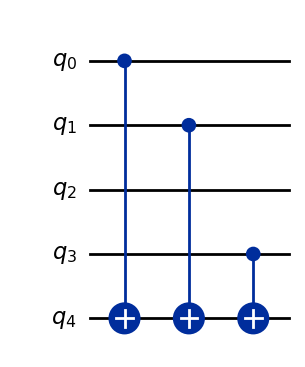

In [ ]:
# all the circuit does is put a cnot on the qubit with a 1 in the bit string and the control is attached to the ancilla qubit which is a 1 after compile_circuit function
# it doesnt even use phase kickback
# i got scammed ;(
def bv_query(s):
 
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc
 
display(bv_query("1011").draw(output="mpl"))

In [ ]:
def compile_circuit(function: QuantumCircuit):
 
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

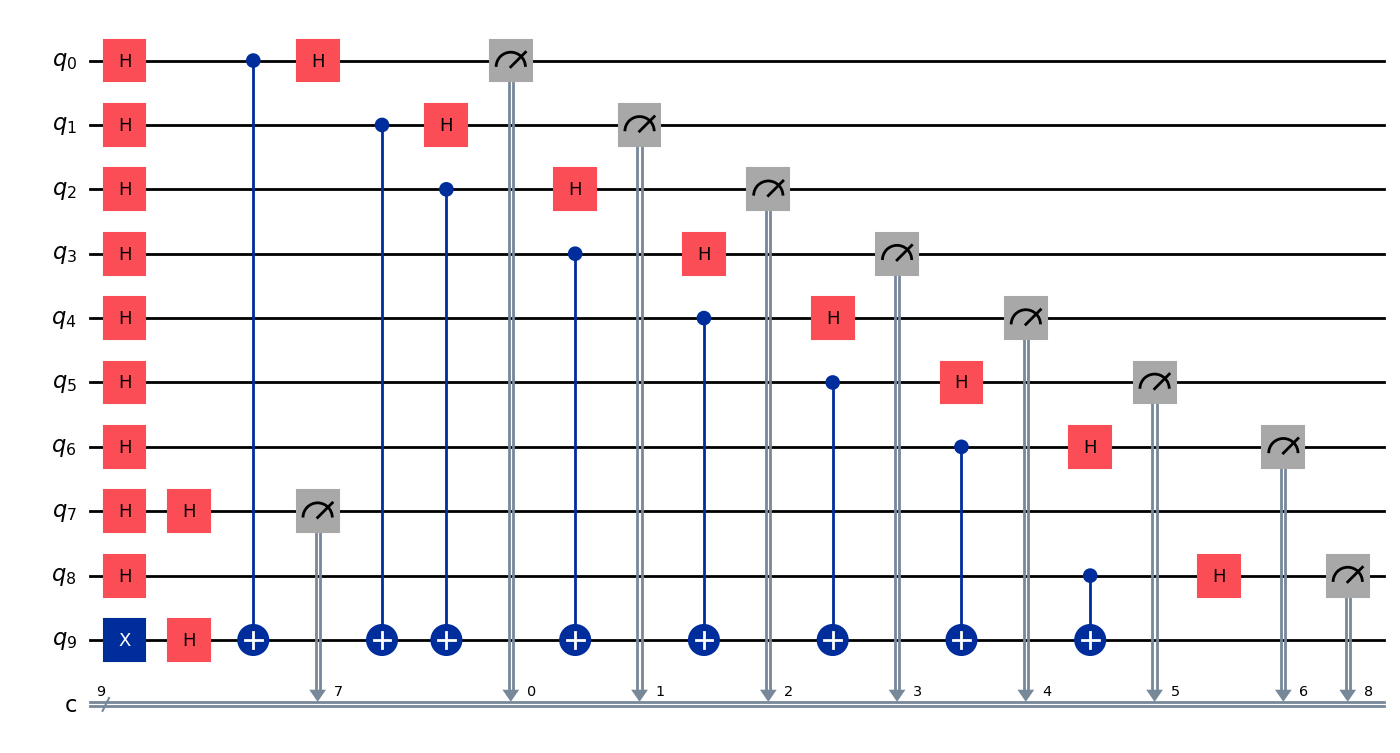

'101111111'

In [ ]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    display(qc.draw(output="mpl"))
    result = AerSimulator().run(qc, shots=1, memory=True).result() # run a 1 time simulation at the measurement blocks
    return result.get_memory()[0] # get the first index of the simulation results
                                  # for my future self when you look back at this for making the youtube videos you are handsome but thats besides the point

display(bv_algorithm(bv_query("101111111"))) # i feel like this is a scam because i put the bit string here and it just prints the bit string ;(